# Model selection.

## 1. Importing libraries 

In [1]:
import pandas as pd
import numpy as np

## 2. Data Visualization 

As seen in the Featuring engineering script it was necessary to increase the dimensionality of the data in order to analyze the impact generated by each concept on the fiscal performance index, here you can see a preview of the dataframe used for the model.

In [2]:
df = pd.read_csv('model_df.csv', sep = ",", encoding = 'utf-8')
df

,Cód. DANE Municipio,Año,obg_administracion,obg_consejo,obg_contraloria,obg_personeria,obg_educacion,obg_salud,obg_servicios,key,...,cat_2,cat_3,cat_4,cat_5,cat_6,cat_ESP,CODIGO_MUNICIPIO,NOMBRE_MPIO,NOMBRE_DEPTO,Invidiuos
0,5001,2012,3.825010e+11,1.500020e+10,2.559250e+10,1.232960e+10,9.337273e+09,6.200632e+09,0.0,5001_2012,...,0,0,0,0,0,1,5001,MEDELLÍN,ANTIOQUIA,MEDELLÍN_ANTIOQUIA_2012
1,5001,2013,3.621940e+11,1.531736e+10,2.743671e+10,1.219142e+10,8.583832e+09,6.190388e+09,0.0,5001_2013,...,0,0,0,0,0,1,5001,MEDELLÍN,ANTIOQUIA,MEDELLÍN_ANTIOQUIA_2013
2,5001,2014,3.972080e+11,1.519391e+10,2.934795e+10,1.289624e+10,9.157378e+09,7.931247e+09,0.0,5001_2014,...,0,0,0,0,0,1,5001,MEDELLÍN,ANTIOQUIA,MEDELLÍN_ANTIOQUIA_2014
3,5001,2015,4.455920e+11,1.677601e+10,3.040276e+10,1.383394e+10,9.822764e+09,8.770415e+09,0.0,5001_2015,...,0,0,0,0,0,1,5001,MEDELLÍN,ANTIOQUIA,MEDELLÍN_ANTIOQUIA_2015
4,5001,2016,4.882370e+11,1.871411e+10,3.246851e+10,1.822217e+10,1.135133e+10,1.058152e+10,0.0,5001_2016,...,0,0,0,0,0,1,5001,MEDELLÍN,ANTIOQUIA,MEDELLÍN_ANTIOQUIA_2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,99773,2015,2.625884e+09,1.484480e+08,0.000000e+00,8.564800e+07,0.000000e+00,0.000000e+00,41573300.0,99773_2015,...,0,0,0,0,1,0,99773,CUMARIBO,VICHADA,CUMARIBO_VICHADA_2015
9833,99773,2016,1.839694e+09,1.582520e+08,0.000000e+00,9.423200e+07,0.000000e+00,0.000000e+00,325469000.0,99773_2016,...,0,0,0,0,1,0,99773,CUMARIBO,VICHADA,CUMARIBO_VICHADA_2016
9834,99773,2017,2.439713e+09,1.708177e+08,0.000000e+00,1.014221e+08,0.000000e+00,0.000000e+00,385210974.0,99773_2017,...,0,0,0,0,1,0,99773,CUMARIBO,VICHADA,CUMARIBO_VICHADA_2017
9835,99773,2019,3.505983e+09,2.085468e+08,0.000000e+00,1.106648e+08,0.000000e+00,0.000000e+00,499098972.0,99773_2019,...,0,0,0,0,1,0,99773,CUMARIBO,VICHADA,CUMARIBO_VICHADA_2019


## 3. Data Spliting

To get a better idea of the distribution of the data, it is noticeable that the data are unbalanced, with close to 90% of the data falling into this category.

In [3]:
df.groupby(['categoria' , 'nivel_desempeño']).count()

Cód. DANE Municipio   Año  obg_administracion  \
categoria nivel_desempeño                                                  
1         Solvente                          73    73                  73   
          Sostenible                       135   135                 135   
          Vulnerable                         5     5                   5   
2         Riesgo                             1     1                   1   
          Solvente                          58    58                  58   
          Sostenible                       105   105                 105   
          Vulnerable                         6     6                   6   
3         Solvente                          62    62                  62   
          Sostenible                        83    83                  83   
          Vulnerable                         6     6                   6   
4         Riesgo                             6     6                   6   
          Solvente                          46    46                  46   
          Sostenible                       133   133                 133   
          Vulnerable                        57    57                  57   
5         Riesgo                             2     2                   2   
          Solvente                          77    77                  77   
          Sostenible                       229   229                 229   
          Vulnerable                        20    20                  20   
6         Deterioro                         22    22                  22   
          Riesgo                          1039  1039                1039   
          Solvente                         241   241                 241   
          Sostenible                      2601  2601                2601   
          Vulnerable                      4776  4776                4776   
ESP       Solvente                          34    34                  34   
          Sostenible                        20    20                  20   

                           obg_consejo  obg_contraloria  obg_personeria  \
categoria nivel_desempeño                                                 
1         Solvente                  73               73              73   
          Sostenible               135              135             135   
          Vulnerable                 5                5               5   
2         Riesgo                     1                1               1   
          Solvente                  58               58              58   
          Sostenible               105              105             105   
          Vulnerable                 6                6               6   
3         Solvente                  62               62              62   
          Sostenible                83               83              83   
          Vulnerable                 6                6               6   
4         Riesgo                     6                6               6   
          Solvente                  46               46              46   
          Sostenible               133              133             133   
          Vulnerable                57               57              57   
5         Riesgo                     2                2               2   
          Solvente                  77               77              77   
          Sostenible               229              229             229   
          Vulnerable                20               20              20   
6         Deterioro                 22               22              22   
          Riesgo                  1039             1039            1039   
          Solvente                 241              241             241   
          Sostenible              2601             2601            2601   
          Vulnerable              4776             4776            4776   
ESP       Solvente                  34               34              34   
          Sostenible    

Similarly, it can be seen that for the performance level response variable, the 'deterioration' class is poorly represented, while sustainable and vulnerable represent $33\%$ and $49\%$ of the data, respectively.

In [4]:
df.groupby(['nivel_desempeño' ]).count()

,Cód. DANE Municipio,Año,obg_administracion,obg_consejo,obg_contraloria,obg_personeria,obg_educacion,obg_salud,obg_servicios,key,...,cat_2,cat_3,cat_4,cat_5,cat_6,cat_ESP,CODIGO_MUNICIPIO,NOMBRE_MPIO,NOMBRE_DEPTO,Invidiuos
nivel_desempeño,,,,,,,,,,,,,,,,,,,,,
Deterioro,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Riesgo,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,...,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048
Solvente,591,591,591,591,591,591,591,591,591,591,...,591,591,591,591,591,591,591,591,591,591
Sostenible,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,...,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306
Vulnerable,4870,4870,4870,4870,4870,4870,4870,4870,4870,4870,...,4870,4870,4870,4870,4870,4870,4870,4870,4870,4870


## 4. Data Sampling

In order to solve this problem and after multiple resampling methods performed on the dataset using the `imblearn.over_sampling` library, it was found that the selection of individuals that gave the best results was the undersampling on category 6.

In [5]:
cat_6 = df[df['categoria'] == '6'].sample(300)
df = df[df['categoria'] != '6']
df = pd.concat([df, cat_6])

After this, 2 datasets `df_19` and `df_20` were created, the latter being the test set that will contain $20\%$ of the data set data.


In [6]:
from sklearn.model_selection import train_test_split
df_19, df_20= train_test_split(df, test_size=0.2)

In [7]:
df_19

,Cód. DANE Municipio,Año,obg_administracion,obg_consejo,obg_contraloria,obg_personeria,obg_educacion,obg_salud,obg_servicios,key,...,cat_2,cat_3,cat_4,cat_5,cat_6,cat_ESP,CODIGO_MUNICIPIO,NOMBRE_MPIO,NOMBRE_DEPTO,Invidiuos
6392,52001,2017,4.798009e+10,2.684210e+09,1.909195e+09,1.469524e+09,1.911682e+09,1.496199e+09,0.0,52001_2017,...,0,0,0,0,0,0,52001,PASTO,NARIÑO,PASTO_NARIÑO_2017
9392,81591,2012,5.284850e+08,8.967900e+07,0.000000e+00,8.117600e+07,0.000000e+00,0.000000e+00,0.0,81591_2012,...,0,0,0,0,1,0,81591,PUERTO RONDÓN,ARAUCA,PUERTO RONDÓN_ARAUCA_2012
3227,19001,2013,2.354667e+10,1.473011e+09,9.006670e+08,8.879790e+08,0.000000e+00,0.000000e+00,0.0,19001_2013,...,1,0,0,0,0,0,19001,POPAYÁN,CAUCA,POPAYÁN_CAUCA_2013
8149,68655,2017,4.769317e+09,2.757143e+08,0.000000e+00,1.279793e+08,0.000000e+00,0.000000e+00,0.0,68655_2017,...,0,0,0,1,0,0,68655,SABANA DE TORRES,SANTANDER,SABANA DE TORRES_SANTANDER_2017
9095,76147,2020,2.269774e+10,8.133736e+08,0.000000e+00,2.313917e+08,1.244544e+09,0.000000e+00,0.0,76147_2020,...,0,1,0,0,0,0,76147,CARTAGO,VALLE DEL CAUCA,CARTAGO_VALLE DEL CAUCA_2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,41551,2016,1.018995e+10,4.738070e+08,0.000000e+00,1.244950e+08,1.505311e+09,7.137840e+07,0.0,41551_2016,...,0,0,0,1,0,0,41551,PITALITO,HUILA,PITALITO_HUILA_2016
4269,25200,2020,5.002834e+09,3.380987e+08,0.000000e+00,1.580395e+08,0.000000e+00,1.301012e+08,544056726.0,25200_2020,...,0,0,0,1,0,0,25200,COGUA,CUNDINAMARCA,COGUA_CUNDINAMARCA_2020
9080,76130,2014,1.349241e+10,5.175280e+08,0.000000e+00,2.156000e+08,0.000000e+00,4.172300e+08,0.0,76130_2014,...,0,1,0,0,0,0,76130,CANDELARIA,VALLE DEL CAUCA,CANDELARIA_VALLE DEL CAUCA_2014
2202,15425,2020,1.137635e+09,1.088171e+08,0.000000e+00,1.313024e+08,0.000000e+00,0.000000e+00,0.0,15425_2020,...,0,0,0,0,1,0,15425,MACANAL,BOYACÁ,MACANAL_BOYACÁ_2020


In [8]:
df_20

,Cód. DANE Municipio,Año,obg_administracion,obg_consejo,obg_contraloria,obg_personeria,obg_educacion,obg_salud,obg_servicios,key,...,cat_2,cat_3,cat_4,cat_5,cat_6,cat_ESP,CODIGO_MUNICIPIO,NOMBRE_MPIO,NOMBRE_DEPTO,Invidiuos
98,5042,2020,9.900554e+09,3.841727e+08,0.000000e+00,1.578343e+08,0.000000e+00,4.395063e+07,0.0,5042_2020,...,0,0,0,1,0,0,5042,SANTAFÉ DE ANTIOQUIA,ANTIOQUIA,SANTAFÉ DE ANTIOQUIA_ANTIOQUIA_2020
6633,52356,2016,1.286343e+10,5.069620e+08,0.000000e+00,1.930470e+08,8.919730e+08,9.908290e+07,0.0,52356_2016,...,0,0,1,0,0,0,52356,IPIALES,NARIÑO,IPIALES_NARIÑO_2016
3730,20400,2015,1.283543e+10,5.157920e+08,0.000000e+00,1.804170e+08,0.000000e+00,0.000000e+00,0.0,20400_2015,...,0,0,1,0,0,0,20400,LA JAGUA DE IBIRICO,CESAR,LA JAGUA DE IBIRICO_CESAR_2015
7207,54553,2016,7.655940e+08,1.067400e+08,0.000000e+00,1.033890e+08,0.000000e+00,0.000000e+00,0.0,54553_2016,...,0,0,1,0,0,0,54553,PUERTO SANTANDER,NORTE DE SANTANDER,PUERTO SANTANDER_NORTE DE SANTANDER_2016
8085,68533,2016,5.805140e+08,8.263400e+07,0.000000e+00,1.031930e+08,0.000000e+00,3.919400e+07,50493000.0,68533_2016,...,0,0,0,0,1,0,68533,PÁRAMO,SANTANDER,PÁRAMO_SANTANDER_2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,5360,2015,5.151390e+10,3.166554e+09,2.356123e+09,2.108618e+09,5.053173e+09,1.464833e+09,0.0,5360_2015,...,0,0,0,0,0,0,5360,ITAGUI,ANTIOQUIA,ITAGUI_ANTIOQUIA_2015
8802,73449,2015,8.859304e+09,4.445670e+08,0.000000e+00,1.803400e+08,0.000000e+00,1.994330e+08,0.0,73449_2015,...,0,0,1,0,0,0,73449,MELGAR,TOLIMA,MELGAR_TOLIMA_2015
5612,41551,2013,6.454381e+09,3.298950e+08,0.000000e+00,1.105040e+08,5.766810e+08,2.684010e+08,0.0,41551_2013,...,0,0,0,1,0,0,41551,PITALITO,HUILA,PITALITO_HUILA_2013
5129,25899,2018,1.860143e+10,1.262131e+09,0.000000e+00,8.269474e+08,1.067099e+09,0.000000e+00,0.0,25899_2018,...,1,0,0,0,0,0,25899,ZIPAQUIRÁ,CUNDINAMARCA,ZIPAQUIRÁ_CUNDINAMARCA_2018


## 3. Data understanding and normalization

Although classification algorithms in general are not affected by the distribution of the data, in this particular case for multi-model testing I consider it necessary to perform a normalization to have the dataset ready even for other models that will not yet be evaluated. Since we are not looking for any particular distribution I will use `min-max`.

## 3.3. Data understanding

<AxesSubplot:>

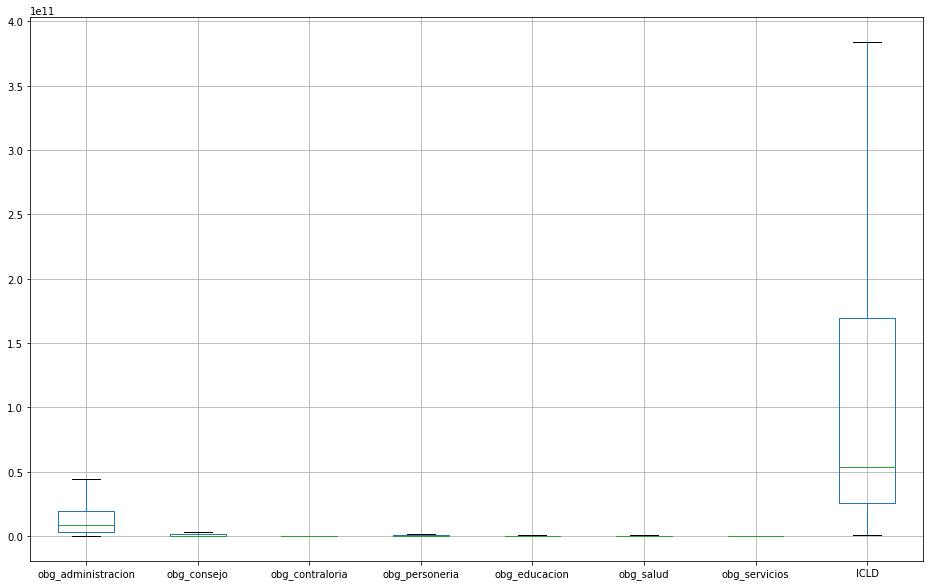

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
df_19[['obg_administracion', 'obg_consejo','obg_contraloria', 'obg_personeria', 
             'obg_educacion', 'obg_salud', 'obg_servicios','ICLD']].boxplot(showfliers=False)

In [10]:
df_19.describe()

,Cód. DANE Municipio,Año,obg_administracion,obg_consejo,obg_contraloria,obg_personeria,obg_educacion,obg_salud,obg_servicios,ICLD,indicador_fiscal,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_ESP,CODIGO_MUNICIPIO
count,1166.000000,1166.000000,1.166000e+03,1.166000e+03,1.166000e+03,1.166000e+03,1.166000e+03,1.166000e+03,1.166000e+03,1.166000e+03,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,37534.089194,2016.006861,3.661036e+10,1.577968e+09,1.366466e+09,1.419311e+09,1.148786e+09,7.117166e+08,1.034533e+09,2.439863e+11,75.273515,0.138937,0.116638,0.107204,0.162093,0.228130,0.210120,0.036878,37534.089194
std,27023.758128,2.590830,1.760927e+11,6.209329e+09,9.535743e+09,9.050685e+09,6.970191e+09,4.592122e+09,1.426987e+10,9.850264e+11,7.095640,0.346029,0.321126,0.309505,0.368694,0.419807,0.407569,0.188544,27023.758128
min,5001.000000,2012.000000,2.987676e+08,3.220000e+05,0.000000e+00,1.310000e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.181156e+09,41.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5001.000000
25%,15479.750000,2014.000000,3.348763e+09,2.157838e+08,0.000000e+00,1.152165e+08,0.000000e+00,0.000000e+00,0.000000e+00,2.561863e+10,71.373236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15479.750000
50%,25740.000000,2016.000000,8.944994e+09,4.202963e+08,0.000000e+00,1.679325e+08,0.000000e+00,0.000000e+00,0.000000e+00,5.400833e+10,76.105000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25740.000000
75%,66127.750000,2018.000000,1.986819e+10,1.334372e+09,0.000000e+00,6.760560e+08,5.221415e+08,2.984636e+08,0.000000e+00,1.695948e+11,79.849447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66127.750000
max,99773.000000,2020.000000,2.749880e+12,9.101129e+10,1.564050e+11,1.459540e+11,1.059710e+11,8.222825e+10,2.255030e+11,1.514147e+13,91.753339,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99773.000000


<AxesSubplot:>

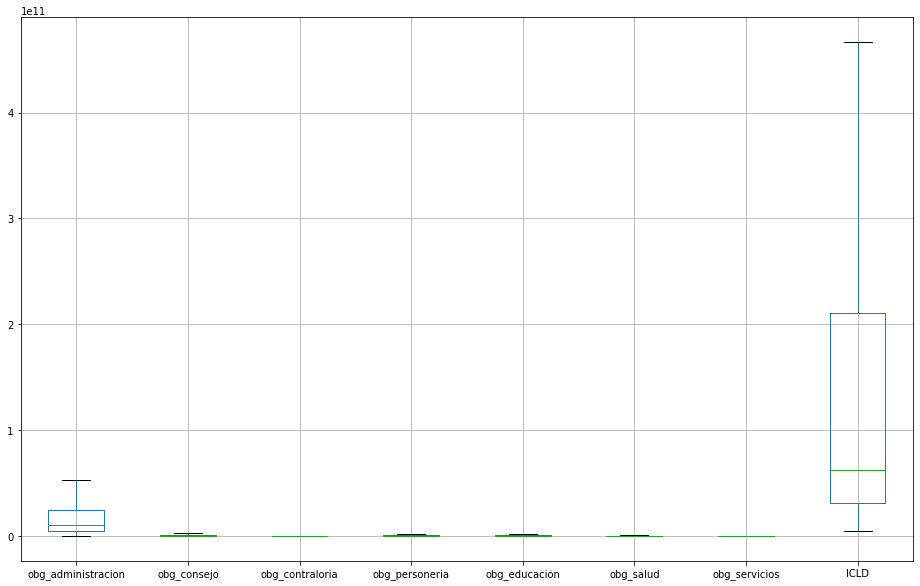

In [11]:
plt.figure(figsize=(16, 10))
df_20[['obg_administracion', 'obg_consejo','obg_contraloria', 'obg_personeria', 
             'obg_educacion', 'obg_salud', 'obg_servicios', 'ICLD']].boxplot(showfliers=False)

## 3.2. Normalization

In [12]:
numeric_variables = ['obg_administracion', 'obg_consejo','obg_contraloria', 'obg_personeria', 'obg_educacion', 'obg_salud', 'obg_servicios', 'ICLD']
categorical_variables = ['Cód. DANE Municipio','nivel_desempeño','cat_ESP','cat_3','cat_4','cat_5']

In [13]:
def normalize(df, numeric_variables, categorical_variables):
    
    data_norm = (df[numeric_variables] - df[numeric_variables].min())/ (df[numeric_variables].max() - df[numeric_variables].min())

    data_norm = pd.merge(df[categorical_variables], data_norm, left_index=True, right_index=True)
    
    return data_norm.set_index('Cód. DANE Municipio')

In [14]:
training_set = normalize(df_19, numeric_variables, categorical_variables)
training_set

,nivel_desempeño,cat_ESP,cat_3,cat_4,cat_5,obg_administracion,obg_consejo,obg_contraloria,obg_personeria,obg_educacion,obg_salud,obg_servicios,ICLD
Cód. DANE Municipio,,,,,,,,,,,,,
52001,Sostenible,0,0,0,0,0.017341,0.029490,0.012207,0.010068,0.018040,0.018196,0.000000,0.034039
81591,Vulnerable,0,0,0,0,0.000084,0.000982,0.000000,0.000555,0.000000,0.000000,0.000000,0.000195
19001,Sostenible,0,0,0,0,0.008455,0.016181,0.005759,0.006083,0.000000,0.000000,0.000000,0.017296
68655,Vulnerable,0,0,0,1,0.001626,0.003026,0.000000,0.000876,0.000000,0.000000,0.000000,0.001930
76147,Sostenible,0,1,0,0,0.008146,0.008934,0.000000,0.001584,0.011744,0.000000,0.000000,0.012845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41551,Sostenible,0,0,0,1,0.003597,0.005203,0.000000,0.000852,0.014205,0.000868,0.000000,0.010479
25200,Sostenible,0,0,0,1,0.001711,0.003711,0.000000,0.001082,0.000000,0.001582,0.002413,0.001547
76130,Sostenible,0,1,0,0,0.004798,0.005683,0.000000,0.001476,0.000000,0.005074,0.000000,0.002998


In [15]:
testing_set = normalize(df_20, numeric_variables, categorical_variables)
testing_set

,nivel_desempeño,cat_ESP,cat_3,cat_4,cat_5,obg_administracion,obg_consejo,obg_contraloria,obg_personeria,obg_educacion,obg_salud,obg_servicios,ICLD
Cód. DANE Municipio,,,,,,,,,,,,,
5042,Sostenible,0,0,0,1,0.005139,0.005796,0.000000,0.001602,0.000000,0.000831,0.000000,0.002845
52356,Vulnerable,0,0,1,0,0.006730,0.007652,0.000000,0.002000,0.013156,0.001874,0.000000,0.013454
20400,Solvente,0,0,1,0,0.006715,0.007785,0.000000,0.001857,0.000000,0.000000,0.000000,0.005453
54553,Vulnerable,0,0,1,0,0.000231,0.001603,0.000000,0.000987,0.000000,0.000000,0.000000,0.000538
68533,Vulnerable,0,0,0,0,0.000132,0.001239,0.000000,0.000985,0.000000,0.000741,0.000337,0.000072
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,Solvente,0,0,0,0,0.027493,0.047845,0.025571,0.023639,0.074534,0.027698,0.000000,0.005595
73449,Solvente,0,0,1,0,0.004579,0.006709,0.000000,0.001856,0.000000,0.003771,0.000000,0.003279
41551,Sostenible,0,0,0,1,0.003287,0.004976,0.000000,0.001067,0.008506,0.005075,0.000000,0.010912


## 4.  Model testing and results

### 4.1. Classification models
To identify the best fitting model to predict the performance level variable, a Grid searchused to quickly evaluate different **hyperparameters** specified in a dictionary on different models. 

In [16]:
# Model importing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [17]:
# Model defining
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()
bagging_model = BaggingClassifier(n_estimators = 1000)

For the classification models the response variable will be given by the `nivel_desempeño`.

In [18]:
# Training variable
X_train = training_set.drop('nivel_desempeño', axis=1)
y_train = training_set['nivel_desempeño']

In [19]:
# testing variable
X_test = testing_set.drop('nivel_desempeño', axis=1)
y_test = testing_set['nivel_desempeño']

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

The different metrics for classification models are imported, but the model will be evaluated mostly by using the harmonic mean F1 score.

$$F1 = \frac{precision * recall}{precision + recall}$$

And all metrics except for the accuracy will be calculated using the **weight** of each variable given that it allow to calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).

In [21]:
def print_metrics(y_true, preds, model_name = None):
    
    if model_name == None:
        print('-------------------------------------------------------------------------------------')
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds, average = 'weighted')))
        print('Recall score: ', format(recall_score(y_true, preds, average = 'weighted')))
        print('F1 score: ', format(f1_score(y_true, preds, average = 'weighted')))
        print('-------------------------------------------------------------------------------------')
        print('\n')
    else:
        print(model_name.center(85,'-'))
        #print(model_name + ' ' + '-'*(84-len(model_name)))
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds, average = 'weighted')))
        print('Recall score: ', format(recall_score(y_true, preds, average = 'weighted')))
        print('F1 score: ', format(f1_score(y_true, preds, average = 'weighted')))
        print('-------------------------------------------------------------------------------------')
        print('\n')

#### 4.1.1 Grid search for classification models

To identify which hyperparameters fit best to our models to obtain a better result we will use `RandomizedSearchCV` which implements a “fit” and a “score” method defined in a dictionary. The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.Not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. 


In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
# build a classifier
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [10, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

In [24]:
# build a classifier for ada boost
clf_ada = AdaBoostClassifier()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}


# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fit the model on the training data
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)


In [25]:
# build a classifier for bagging
clf_bag = BaggingClassifier()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist = {"n_estimators": [10, 100, 200, 400],
              "max_samples": list(range(2, 11)),
              "max_features": list(range(2, 11)),
              "bootstrap": [True, False],
              "warm_start": [True, False],}


# Run a randomized search over the hyperparameters
bag_search = RandomizedSearchCV(clf_bag, param_distributions=param_dist)

# Fit the model on the training data
bag_search.fit(X_train, y_train)

# Make predictions on the test data
bag_preds = ada_search.best_estimator_.predict(X_test)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)


#### 4.1.2 Metrics results for classification models

Finally we printed the results, where The classification models evaluated were **Random Forest, KNN, Adaboost, Bagging classifier**, since the data were not balanced. Sampling is performed on category 6 and the following results are obtained for the metrics **accuracy, precision, recall and F1**. It can be clearly seen that the best results generated by the **Random Forest** and **KNN** with $K = 20$.


In [27]:
print_metrics(y_test, rf_preds, 'Random forest')
print_metrics(y_test, ada_preds, 'Adaboost')
print_metrics(y_test, bag_preds, 'Bagging')
print_metrics(y_test, knn_pred, 'KNN')

------------------------------------Random forest------------------------------------
Accuracy score:  0.6712328767123288
Precision score:  0.6614591881825643
Recall score:  0.6712328767123288
F1 score:  0.6403212104840372
-------------------------------------------------------------------------------------


---------------------------------------Adaboost--------------------------------------
Accuracy score:  0.5993150684931506
Precision score:  0.43457552521568305
Recall score:  0.5993150684931506
F1 score:  0.49058606582780645
-------------------------------------------------------------------------------------


---------------------------------------Bagging---------------------------------------
Accuracy score:  0.5993150684931506
Precision score:  0.43457552521568305
Recall score:  0.5993150684931506
F1 score:  0.49058606582780645
-------------------------------------------------------------------------------------


-----------------------------------------KNN-------------------

D:\Programas\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programas\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programas\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programas\miniconda3\envs\tf-gpu\lib\site-packages\sklearn

Being the hyperparameters of the decision album the following.

In [28]:
random_search.best_params_

{'n_estimators': 186,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 1,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': False}

### 4.2. Deep Neural Network implentation.

As part of the academic exercise and to verify if there is an improvement over the implementation of other models, a deep neural network was implemented.

For this purpose, a new variable is created that maps all the different classes of the performance level using numerical variables.

In [29]:
conditionlist = [
    (df['nivel_desempeño'] == 'Solvente') ,
    (df['nivel_desempeño'] == 'Sostenible'),
    (df['nivel_desempeño'] == 'Vulnerable') ,
    (df['nivel_desempeño'] == 'Riesgo'),
    (df['nivel_desempeño'] == 'Deterioro')]
choicelist = [1, 2, 3, 4, 5]

df['y'] = np.select(conditionlist, choicelist, default='Not Specified')

The same variables used with the classification models are used.  However, in this case the dataset will not be divided into training and classification sets, given the small number of individuals and the fact that we only intend to observe the accuracy results with respect to other models.

In [30]:
X = df[['obg_administracion', 'obg_consejo','obg_contraloria', 'obg_personeria', 
        'obg_educacion', 'obg_salud', 'obg_servicios', 'ICLD' , 
        'cat_ESP','cat_3','cat_4','cat_5']]

y = df['y'].astype('int64')


Before passing the data over the neural network, a standard normalization will be used, which will distribute the vast majority of the data between -3 and 3:
As part of the recommendations given [here](https://www.tensorflow.org/tutorials/load_data/pandas_dataframe).


$$Z = \frac{X-\mu}{\sigma}$$

In [31]:
import tensorflow as tf
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X)
normalizer(X.iloc[:3])

<tf.Tensor: shape=(3, 12), dtype=float32, numpy=
array([[ 1.9914398 ,  2.1311247 ,  2.569497  ,  1.2206393 ,  1.1768684 ,
         1.205792  , -0.07857238,  1.8781444 ,  5.0990195 , -0.3398997 ,
        -0.44610885, -0.53876287],
       [ 1.8743056 ,  2.1816757 ,  2.7654538 ,  1.205121  ,  1.0681661 ,
         1.2035335 , -0.07857238,  2.2014413 ,  5.0990195 , -0.3398997 ,
        -0.44610885, -0.53876287],
       [ 2.0762725 ,  2.162     ,  2.9685328 ,  1.2842742 ,  1.1509141 ,
         1.5873361 , -0.07857238,  2.3892882 ,  5.0990195 , -0.3398997 ,
        -0.44610885, -0.53876287]], dtype=float32)>

The DNN architecture will be given by only 3 layers, the first layer has 10 times more nodes than the number of variables, the other layers will be decreasing the number by half using the `relu` activation function for the intermediate layers, and the output probability function will be the `softmax` activation function because it allows to perform results on multivariable datasets.

In [41]:
model = tf.keras.Sequential([normalizer,
                            tf.keras.layers.Dense(120, activation = 'relu'),
                            tf.keras.layers.Dense(60, activation = 'relu'),
                            tf.keras.layers.Dense(30, activation = 'relu'),
                            tf.keras.layers.Dense(15, activation = 'softmax')
                            ])

We will use the `adam` optimization function to seek to take advantage of the momentum of the gradient decay algorithm and a convergence to the minimum loss through `sparse categorical crossentropy` to calculate the accuracy.

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

As can be seen by using all the data it achieves an accuray of $65\%$ for 15 epoch and batch of 32

In [43]:
BATCH_SIZE = 32

model.fit(X, y, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
46/46 [==============================] - 0s 3ms/step - loss: 2.0958 - accuracy: 0.4198
Epoch 2/15
46/46 [==============================] - 0s 3ms/step - loss: 1.0942 - accuracy: 0.5652
Epoch 3/15
46/46 [==============================] - 0s 3ms/step - loss: 0.9853 - accuracy: 0.5754
Epoch 4/15
46/46 [==============================] - 0s 3ms/step - loss: 0.9551 - accuracy: 0.6043
Epoch 5/15
46/46 [==============================] - 0s 3ms/step - loss: 0.9295 - accuracy: 0.5940
Epoch 6/15
46/46 [==============================] - 0s 3ms/step - loss: 0.9132 - accuracy: 0.5988
Epoch 7/15
46/46 [==============================] - 0s 3ms/step - loss: 0.8964 - accuracy: 0.6063
Epoch 8/15
46/46 [==============================] - 0s 3ms/step - loss: 0.8913 - accuracy: 0.6097
Epoch 9/15
46/46 [==============================] - 0s 3ms/step - loss: 0.8801 - accuracy: 0.6111
Epoch 10/15
46/46 [==============================] - 0s 3ms/step - loss: 0.8653 - accuracy: 0.6193
Epoch 11/15
46/46 [

### 4.3 Regression models

As part of the academic exercise and because we have a numerical response variable, we will test with regression models.

### 4.3.1 Correlation between variables

Before starting this analysis, the correlation of the variables was checked to identify the multicollinearity and correlation with the response variable.
All variables to be used are defined

In [68]:
numeric_variables = ['obg_administracion', 'obg_consejo','obg_contraloria', 'obg_personeria', 
             'obg_educacion', 'obg_salud', 'obg_servicios', 'ICLD', 'indicador_fiscal']

categorical_variables = ['Cód. DANE Municipio','cat_3','cat_4','cat_5','cat_ESP']

It is observed that under the **Pearson** criterion there is a multicollinearity between all the variables and a low correlation with the variable response `indicador_fiscal`, which indicates that a linear model is not the most appropriate one.

<AxesSubplot:>

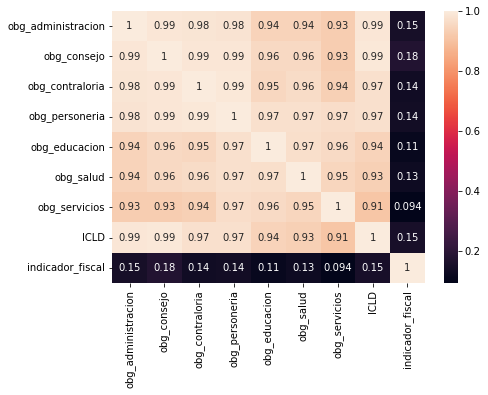

In [69]:
import seaborn as sns
plt.figure(figsize=(7, 5))
sns.heatmap(df[numeric_variables].corr( method = 'pearson'),annot=True)

Similarly, the **Kendall** and **Spearman** correlation criteria based on the correlation between the range of the variables do not yield a significant correlation, which is an indication that other regression models will not yield significant results.

<AxesSubplot:>

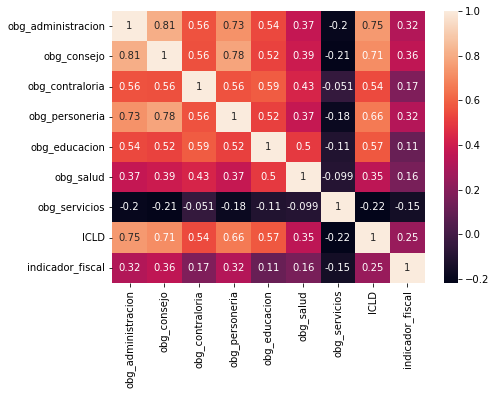

In [70]:
plt.figure(figsize=(7, 5))
sns.heatmap(df[numeric_variables].corr( method = 'kendall'),annot=True)

<AxesSubplot:>

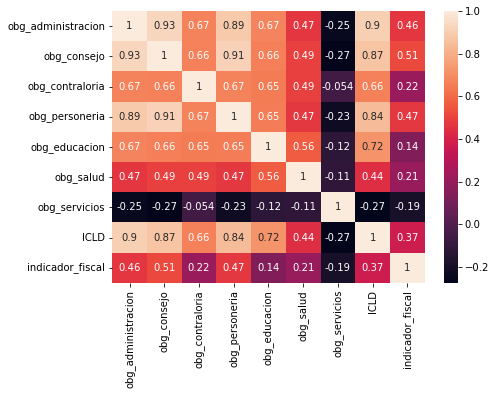

In [71]:
plt.figure(figsize=(7, 5))
sns.heatmap(df[numeric_variables].corr( method = 'spearman'),annot=True)

### 4.3.3 Random grid search

As previously done, a function is defined to quickly visualize the results of the $R^2$, $MSE$ and $MAE$ metrics.

In [72]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [73]:
def print_metrics(y_true, preds, model_name = None):
    
    if model_name == None:
        print('-------------------------------------------------------------------------------------')
        print('R2 score: ', format(r2_score(y_true, preds)))
        print('MSE: ', format(mean_squared_error(y_true, preds)))
        print('MAE: ', format(mean_absolute_error(y_true, preds)))
        print('-------------------------------------------------------------------------------------')
        print('\n')
    else:
        print(model_name.center(85,'-'))
        print('R2 score: ', format(r2_score(y_true, preds)))
        print('MSE: ', format(mean_squared_error(y_true, preds)))
        print('MAE: ', format(mean_absolute_error(y_true, preds)))
        print('-------------------------------------------------------------------------------------')
        print('\n')

In [74]:
# Model importing
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Again, the data are divided into training and test sets.

In [75]:
training_set = normalize(df_19, numeric_variables, categorical_variables)
training_set

,cat_3,cat_4,cat_5,cat_ESP,obg_administracion,obg_consejo,obg_contraloria,obg_personeria,obg_educacion,obg_salud,obg_servicios,ICLD,indicador_fiscal
Cód. DANE Municipio,,,,,,,,,,,,,
52001,0,0,0,0,0.017341,0.029490,0.012207,0.010068,0.018040,0.018196,0.000000,0.034039,0.682756
81591,0,0,0,0,0.000084,0.000982,0.000000,0.000555,0.000000,0.000000,0.000000,0.000195,0.466742
19001,0,0,0,0,0.008455,0.016181,0.005759,0.006083,0.000000,0.000000,0.000000,0.017296,0.747065
68655,0,0,1,0,0.001626,0.003026,0.000000,0.000876,0.000000,0.000000,0.000000,0.001930,0.385337
76147,1,0,0,0,0.008146,0.008934,0.000000,0.001584,0.011744,0.000000,0.000000,0.012845,0.642266
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41551,0,0,1,0,0.003597,0.005203,0.000000,0.000852,0.014205,0.000868,0.000000,0.010479,0.608197
25200,0,0,1,0,0.001711,0.003711,0.000000,0.001082,0.000000,0.001582,0.002413,0.001547,0.726537
76130,1,0,0,0,0.004798,0.005683,0.000000,0.001476,0.000000,0.005074,0.000000,0.002998,0.681363


In [76]:
testing_set = normalize(df_20, numeric_variables, categorical_variables)
testing_set

,cat_3,cat_4,cat_5,cat_ESP,obg_administracion,obg_consejo,obg_contraloria,obg_personeria,obg_educacion,obg_salud,obg_servicios,ICLD,indicador_fiscal
Cód. DANE Municipio,,,,,,,,,,,,,
5042,0,0,1,0,0.005139,0.005796,0.000000,0.001602,0.000000,0.000831,0.000000,0.002845,0.569204
52356,0,1,0,0,0.006730,0.007652,0.000000,0.002000,0.013156,0.001874,0.000000,0.013454,0.405068
20400,0,1,0,0,0.006715,0.007785,0.000000,0.001857,0.000000,0.000000,0.000000,0.005453,0.766481
54553,0,1,0,0,0.000231,0.001603,0.000000,0.000987,0.000000,0.000000,0.000000,0.000538,0.369038
68533,0,0,0,0,0.000132,0.001239,0.000000,0.000985,0.000000,0.000741,0.000337,0.000072,0.482240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,0,0,0,0,0.027493,0.047845,0.025571,0.023639,0.074534,0.027698,0.000000,0.005595,0.774950
73449,0,1,0,0,0.004579,0.006709,0.000000,0.001856,0.000000,0.003771,0.000000,0.003279,0.743236
41551,0,0,1,0,0.003287,0.004976,0.000000,0.001067,0.008506,0.005075,0.000000,0.010912,0.589631


In [77]:
# Training variable
X_train = training_set.drop('indicador_fiscal', axis=1)
y_train = training_set['indicador_fiscal']
X_train

,cat_3,cat_4,cat_5,cat_ESP,obg_administracion,obg_consejo,obg_contraloria,obg_personeria,obg_educacion,obg_salud,obg_servicios,ICLD
Cód. DANE Municipio,,,,,,,,,,,,
52001,0,0,0,0,0.017341,0.029490,0.012207,0.010068,0.018040,0.018196,0.000000,0.034039
81591,0,0,0,0,0.000084,0.000982,0.000000,0.000555,0.000000,0.000000,0.000000,0.000195
19001,0,0,0,0,0.008455,0.016181,0.005759,0.006083,0.000000,0.000000,0.000000,0.017296
68655,0,0,1,0,0.001626,0.003026,0.000000,0.000876,0.000000,0.000000,0.000000,0.001930
76147,1,0,0,0,0.008146,0.008934,0.000000,0.001584,0.011744,0.000000,0.000000,0.012845
...,...,...,...,...,...,...,...,...,...,...,...,...
41551,0,0,1,0,0.003597,0.005203,0.000000,0.000852,0.014205,0.000868,0.000000,0.010479
25200,0,0,1,0,0.001711,0.003711,0.000000,0.001082,0.000000,0.001582,0.002413,0.001547
76130,1,0,0,0,0.004798,0.005683,0.000000,0.001476,0.000000,0.005074,0.000000,0.002998


In [78]:
# Testing variable
X_test = testing_set.drop('indicador_fiscal', axis=1)
y_test = testing_set['indicador_fiscal']

As with the classification models, RandomizedSearchCV will be used to identify which parameters in a dictionary best fit our data.

In [79]:
# build a classifier
reg_rf = RandomForestRegressor()

# Set up the hyperparameter search
param_dist = {"max_depth": [10, None],
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["squared_error", "absolute_error", "poisson"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(reg_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

In [80]:
# DecisionTree
dt_rf = DecisionTreeRegressor()

# Set up the hyperparameter search
param_dist = {"splitter": ['best', "random"],
              "max_depth": [10, None],
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(dt_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
dt_preds = random_search.best_estimator_.predict(X_test)

In [81]:
# build a Regressor for ada boost
reg_ada = AdaBoostRegressor()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}


# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(reg_ada, param_distributions=param_dist)

# Fit the model on the training data
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

In [82]:
# build LinearRegression
reg_mod = LinearRegression()
reg_mod.fit(X_train, y_train)
reg_pred = reg_mod.predict(X_test)

Although the **MAE** and **MSE** metrics indicate a low percentage error, the $R^2$ score indicates that there is a low quality of the model and of the variance of the response variable explained by it.

In [83]:
print_metrics(y_test, rf_preds, 'Random forest')
print_metrics(y_test, dt_preds, 'Decision Tree')
print_metrics(y_test, ada_preds, 'Adaboost')
print_metrics(y_test, reg_pred, 'Linear Reg')

------------------------------------Random forest------------------------------------
R2 score:  0.270955148421704
MSE:  0.02122842753229111
MAE:  0.10734410798131887
-------------------------------------------------------------------------------------


------------------------------------Decision Tree------------------------------------
R2 score:  0.19093016921121597
MSE:  0.02355860580358023
MAE:  0.11489970993888632
-------------------------------------------------------------------------------------


---------------------------------------Adaboost--------------------------------------
R2 score:  0.08856308064000529
MSE:  0.026539344665834155
MAE:  0.12533594356122385
-------------------------------------------------------------------------------------


--------------------------------------Linear Reg-------------------------------------
R2 score:  -0.04093205737383987
MSE:  0.030310001775831895
MAE:  0.12690307930565592
-----------------------------------------------------------

## 5. Conclusion of the model selection

In conclusion, from the model selection,taking as reference only the evaluated variables,
it can be said that all the expenses concepts and incomes (ICLD) represent a greater
influence at the moment of classifying the performance of a municipality, at the same
time if they belong or not to the ESPECIAL category.

It can be seen that the models that obtain the best results are the classification models,
especially, Random forest and the KNN.For the case of K-means with $K = 20$, K
represents the number of clusters in the data set, i.e. the data are grouped according to
how similar they are to each other. For these, the distance between the individuals and
the other items is calculated.

On the other hand if a classification model is generated on the data without including
the data of category 6, using Random Forest, it is possible to obtain results close
to $80\%$, for the metrics of **accuracy, precision, recall and F1**.

